<a href="https://colab.research.google.com/github/dhanaabhirajk/tensorflow-learn/blob/main/Random_Forest_regression_skill.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
dataset = pd.read_csv("/content/city_temperature.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
dataset = dataset.drop("State",axis = 1)
dataset = dataset.drop(102414)

In [ ]:
dataset

,Region,Country,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,Algiers,1,1,1995,64.2
1,Africa,Algeria,Algiers,1,2,1995,49.4
2,Africa,Algeria,Algiers,1,3,1995,48.8
3,Africa,Algeria,Algiers,1,4,1995,46.4
4,Africa,Algeria,Algiers,1,5,1995,47.9
...,...,...,...,...,...,...,...
2906322,North America,US,San Juan Puerto Rico,7,27,2013,82.4
2906323,North America,US,San Juan Puerto Rico,7,28,2013,81.6
2906324,North America,US,San Juan Puerto Rico,7,29,2013,84.2
2906325,North America,US,San Juan Puerto Rico,7,30,2013,83.8


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
dataset[["Region","Country","City"]] = ord_enc.fit_transform(dataset[["Region","Country","City"]])

In [ ]:
ord_enc.categories_

[array(['Africa', 'Asia', 'Australia/South Pacific', 'Europe',
        'Middle East', 'North America',
        'South/Central America & Carribean'], dtype=object),
 array(['Albania', 'Algeria', 'Argentina', 'Australia', 'Austria',
        'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
        'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bolivia', 'Brazil',
        'Bulgaria', 'Burundi', 'Canada', 'Central African Republic',
        'China', 'Colombia', 'Congo', 'Costa Rica', 'Croatia', 'Cuba',
        'Cyprus', 'Czech Republic', 'Denmark', 'Dominican Republic',
        'Egypt', 'Equador', 'Ethiopia', 'Finland', 'France', 'Gabon',
        'Gambia', 'Georgia', 'Germany', 'Greece', 'Guatemala', 'Guinea',
        'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hong Kong',
        'Hungary', 'Iceland', 'India', 'Indonesia', 'Ireland', 'Israel',
        'Italy', 'Ivory Coast', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya',
        'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'Ma

In [ ]:
dataset

,Region,Country,City,Month,Day,Year,AvgTemperature
0,0.0,1.0,7.0,1,1,1995,64.2
1,0.0,1.0,7.0,1,2,1995,49.4
2,0.0,1.0,7.0,1,3,1995,48.8
3,0.0,1.0,7.0,1,4,1995,46.4
4,0.0,1.0,7.0,1,5,1995,47.9
...,...,...,...,...,...,...,...
2906322,5.0,114.0,261.0,7,27,2013,82.4
2906323,5.0,114.0,261.0,7,28,2013,81.6
2906324,5.0,114.0,261.0,7,29,2013,84.2
2906325,5.0,114.0,261.0,7,30,2013,83.8


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2906326 entries, 0 to 2906326
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Region          float64
 1   Country         float64
 2   City            float64
 3   Month           int64  
 4   Day             int64  
 5   Year            int64  
 6   AvgTemperature  float64
dtypes: float64(4), int64(3)
memory usage: 177.4 MB


In [ ]:
x = dataset.iloc[:,0:6].values
y = dataset.iloc[:,6].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 5.951473276769061
Mean Squared Error: 298.72877920968523
Root Mean Squared Error: 17.28377213485775


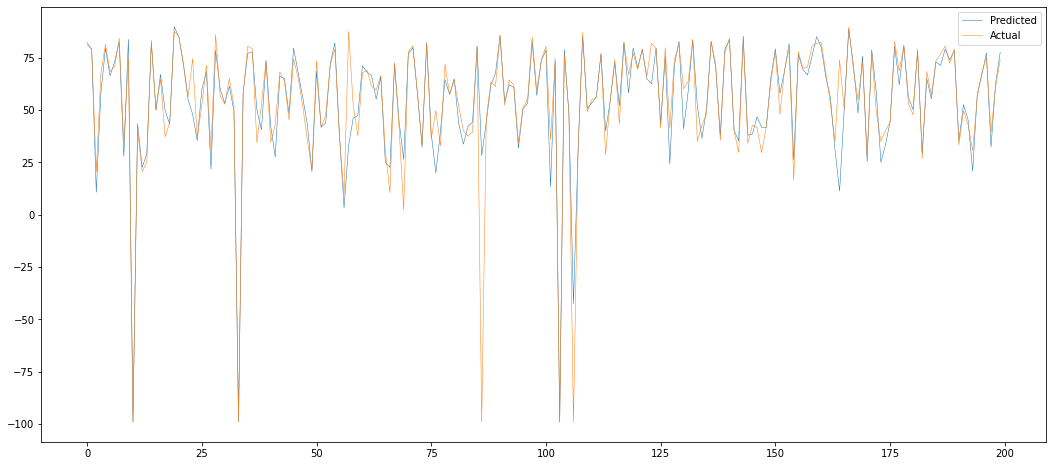

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (18,8))
plt.plot(y_pred[0:200],label ="Predicted",linewidth='0.5')
plt.plot(y_test[0:200],label = "Actual",linewidth='0.5')
plt.legend()
plt.show()